### Exploratory Data Analysis

#### Most common words

In [8]:
import pandas as pd

In [10]:
data_dtm = pd.read_pickle("../data/docterm_matrix.pkl")
data_dtm = data_dtm.transpose()
data_dtm.head()

,left,right
abest,0,1
acosta,0,1
acting,0,2
administration,0,3
affects,1,0


In [11]:
# Find top 30 words by each wing
top_dict = {}
for c in data_dtm.columns:
    top = data_dtm[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))

top_dict

{'left': [('biden', 2),
  ('new', 2),
  ('joe', 2),
  ('gives', 1),
  ('revenue', 1),
  ('employers', 1),
  ('market', 1),
  ('tax', 1),
  ('manchin', 1),
  ('pentagon', 1),
  ('lured', 1),
  ('paradigm', 1),
  ('books', 1),
  ('loved', 1),
  ('times', 1),
  ('birthrate', 1),
  ('limiting', 1),
  ('scope', 1),
  ('physical', 1),
  ('traded', 1),
  ('president', 1),
  ('hard', 1),
  ('leverage', 1),
  ('friend', 1),
  ('contact', 1),
  ('consequence', 1),
  ('extrajudicial', 1),
  ('share', 1),
  ('family', 1),
  ('fanboy', 1)],
 'right': [('carlson', 7),
  ('tucker', 6),
  ('biden', 6),
  ('tonight', 4),
  ('news', 4),
  ('reacts', 4),
  ('ingraham', 4),
  ('host', 4),
  ('discuss', 4),
  ('angle', 4),
  ('fox', 4),
  ('border', 3),
  ('hannity', 3),
  ('new', 3),
  ('united', 3),
  ('administration', 3),
  ('year', 3),
  ('director', 2),
  ('democrats', 2),
  ('state', 2),
  ('states', 2),
  ('suffering', 2),
  ('rep', 2),
  ('primetime', 2),
  ('possibility', 2),
  ('law', 2),
  ('po

In [12]:
# Top 15 words by each wing
for w, top_words in top_dict.items():
    print(w)
    print(' '.join([word for word, count in top_words[0:14]]))

left
biden new joe gives revenue employers market tax manchin pentagon lured paradigm books loved
right
carlson tucker biden tonight news reacts ingraham host discuss angle fox border hannity new


#### Word clouds

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction import text

In [20]:
# Get stop words
stop_words = text.ENGLISH_STOP_WORDS
len(stop_words)

318

In [21]:
wc = WordCloud(stopwords=stop_words, background_color="white",
              colormap="Dark2", max_font_size=150, random_state=40)

In [23]:
# Read in cleaned data
data_clean = pd.read_pickle('../data/corpus.pkl')

In [25]:
data_clean

,content,wing
left,trouble for the florida fanboy our legal syste...,left
right,tucker carlson tonight host tucker carlson unp...,right


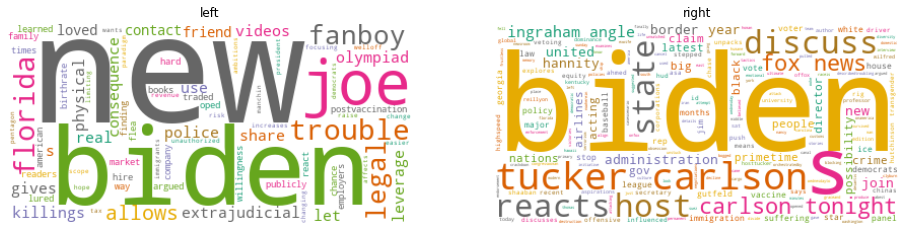

In [28]:
# Show word cloud
plt.rcParams['figure.figsize'] = [16, 6]
full_names = ["left", "right"]
for index, wing in enumerate(data_dtm.columns):
    wc.generate(data_clean.content[wing])
    plt.subplot(1,2, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()